In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2023-01-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,759.429993,760.619995,756.840027,759.130005,759.130005,0
2012-03-13,761.450012,773.030029,761.450012,772.979980,772.979980,0
2012-03-14,773.190002,774.679993,769.280029,771.630005,771.630005,0
2012-03-15,772.380005,776.469971,770.739990,776.419983,776.419983,0
2012-03-16,776.559998,778.099976,775.640015,777.130005,777.130005,0
2012-03-19,777.119995,782.549988,776.070007,780.090027,780.090027,0
2012-03-20,778.030029,778.299988,773.119995,777.369995,777.369995,0
2012-03-21,777.559998,778.650024,774.760010,776.150024,776.150024,0
2012-03-22,773.640015,773.640015,768.000000,770.270020,770.270020,0


In [2]:
# Añadiendo indicadores
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

#data['Target'] = data['Adj Close']-data.Open
#data['Target'] = data['Target'].shift(-1)

#data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [3]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#data_set.rename(columns=None, index=None)[:,:8]
#data_set
data_set_filtered = data_set.loc[:, ['Open', 'High','Low', 'Adj Close', 'RSI', 'EMAF','EMAM','EMAS']]
data_set_numpy_array=data_set_filtered.to_numpy()
desired_output = data_set.loc[:, ['TargetNextClose']]
desired_output




,TargetNextClose
0,787.179993
1,793.440002
2,801.599976
3,805.039978
4,803.330017
...,...
2570,2097.010010
2571,2114.320068
2572,2089.030029
2573,2135.949951


In [4]:
#Columna objetivo Categorías
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [5]:

from sklearn.preprocessing import MinMaxScaler
input_scaler = MinMaxScaler(feature_range=(0,1))
input_scaler.fit(data_set_numpy_array)

'''My input is x my output is y'''


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
output_scaler= MinMaxScaler(feature_range=(0,1))
output_scaler.fit(desired_output)

MinMaxScaler()

In [ ]:

#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range=(0,1))
#data_set = sc.fit_transform(data_set)
#print(data_set)

In [ ]:
# característica múltiple de los datos proporcionados al modelo
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values

backcandles = 30
'''print(data_set.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set.shape[0]):#backcandles+2
        X[j].append(data_set[i-backcandles:i, j])'''
def split_by_block(array, backcandles, number_of_blocks) :
    output = []
    for i in range(number_of_blocks) :
        output.append(array[i:i+backcandles, :])
    return output

#mover el eje de 0 a la posición 2
X=np.moveaxis(X, [0], [2])

#borrar los primeros elementos de Y, debido a los backcandles para que coincidan con la longitud de X
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Elegir -1 para la última columna, clasificación si no -2...
unscaled_X, yi =np.array(X), np.array(data_set[backcandles:,-1])
unscaled_y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(unscaled_X)
print(unscaled_X.shape)
print(unscaled_y)
print(unscaled_y.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scalar = MinMaxScaler(feature_range=(0,1))
x = x_scalar.fit_transform(unscaled_X)
print(x)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [ ]:
#List comprehesions para X (Hay que retocar)
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2036
(2036, 30, 8)
(509, 30, 8)
(2036, 1)
(509, 1)
[[0.01673005]
 [0.01859073]
 [0.01876841]
 ...
 [0.71298573]
 [0.70975578]
 [0.71198751]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(5, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
123/123 [==============================] - 2s 10ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 2/30
123/123 [==============================] - 1s 8ms/step - loss: 1.0894e-04 - val_loss: 0.0011
Epoch 3/30
123/123 [==============================] - 1s 8ms/step - loss: 1.0594e-04 - val_loss: 0.0012
Epoch 4/30
123/123 [==============================] - 1s 8ms/step - loss: 1.1233e-04 - val_loss: 0.0013
Epoch 5/30
123/123 [==============================] - 1s 9ms/step - loss: 1.2327e-04 - val_loss: 0.0015
Epoch 6/30
123/123 [==============================] - 1s 8ms/step - loss: 1.0848e-04 - val_loss: 0.0031
Epoch 7/30
123/123 [==============================] - 1s 8ms/step - loss: 1.5404e-04 - val_loss: 8.8990e-04
Epoch 8/30
123/123 [==============================] - 1s 8ms/step - loss: 1.1240e-04 - val_loss: 8.6638e-04
Epoch 9/30
123/123 [==============================] - 1s 8ms/step - loss: 1.2055e-04 - val_loss: 8.1168e-04
Epoch 10/30
123/123 [==============================] - 

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 0s 4ms/step
[0.7179049] [0.71781515]
[0.7206674] [0.70153448]
[0.7261536] [0.70988121]
[0.7038758] [0.71664952]
[0.7122137] [0.73416359]
[0.72134113] [0.7400905]
[0.73685545] [0.73337961]
[0.74363357] [0.73536571]
[0.7374162] [0.73711141]
[0.74033356] [0.73378206]


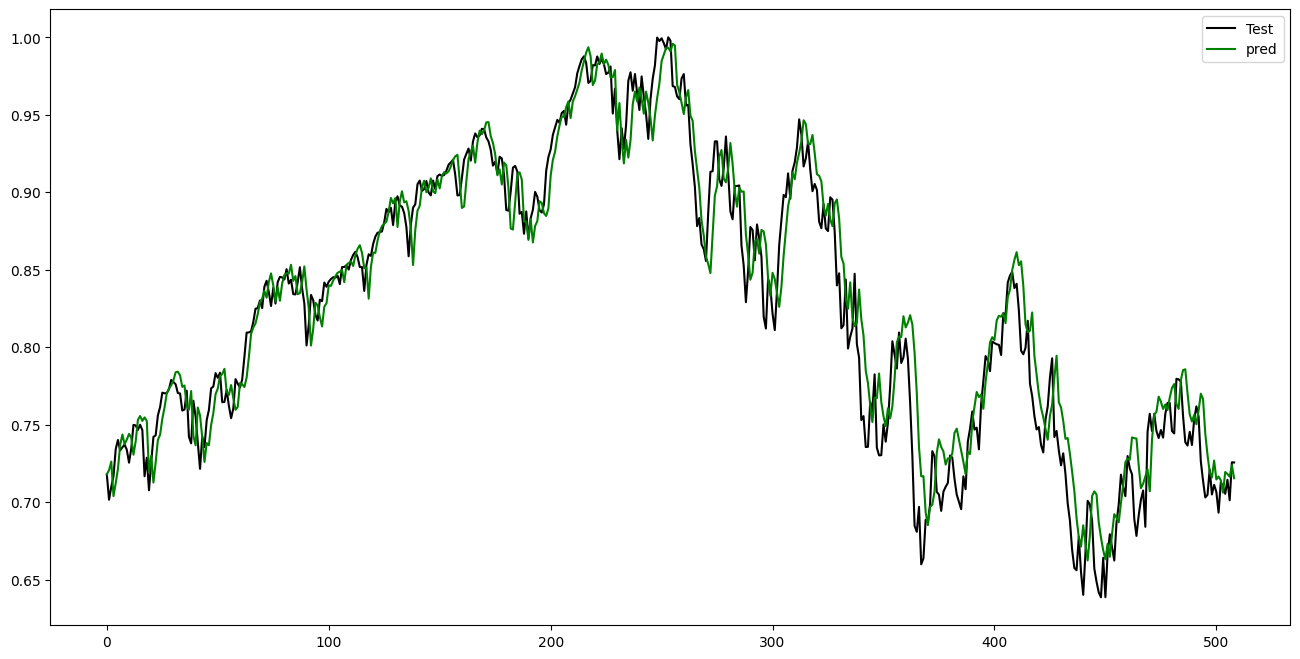

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()